# INFO 2950 - FINAL PROJECT (Avni Kulshrestha, Aryana Thapliyal, and Ishneet Sachar)

# Introduction

Our final project hopes to discover a relationship between AQI index, population size, and income level across the different states and their respective counties in the US. We found three separate datasets (state and county AQI, population size, and income level) and pulled all the relevant data we needed to do our analysis. We hope to see if there is any relationship amongst the three variables. 

Our Hypothesis and research questions are: 
On the one hand, we might expect a negative effect of population and income on AQI because a higher population would be correlated with more pollution. Higher income might also be correlated with a higher car ownership, all contributing to lower air quality.
On the other hand, we might also expect a positive effect of population and income on AQI because more rural areas (with less population and probably lower income) might be designated as factory/industrial areas, which would lead to lower AQI.  

Our data analysis below will investigate the variables in comparison to one another to see if there are any relationships between the variables, to answer our research question.


# Data Analysis

## Summary Statistics

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats #for two-sample independent t-test 

In [79]:
#Our combined and cleaned datasets, done in a previous project phase.
combined = pd.read_csv('FinalCombined.csv')

In [80]:
combined.head()

,Unnamed: 0,State,Abbreviation,County,avg_aqi,Pop_Estimate,Per capita personal income 2018
0,0,Alabama,AL,Baldwin,36.83,"218,022","45,596"
1,1,Alabama,AL,Clay,28.99,"13,275","33,530"
2,2,Alabama,AL,Colbert,35.64,"54,762","38,378"
3,3,Alabama,AL,DeKalb,36.72,"71,385","31,916"
4,4,Alabama,AL,Elmore,35.33,"81,887","42,269"


In [81]:
mean_aqi = np.mean(combined["avg_aqi"])
print('The mean of the average air quality index is', mean_aqi)

combined["Pop_Estimate"] = combined["Pop_Estimate"].str.replace(",", "")
#combined["Pop_Estimate"][0]
combined["Pop_Estimate"] = pd.to_numeric(combined["Pop_Estimate"])
#combined["Pop_Estimate"][0]
mean_pop_est = np.mean(combined["Pop_Estimate"])
print('The mean population estimate is', mean_pop_est)
combined["Per capita personal income 2018"] = combined["Per capita personal income 2018"].str.replace(",", "")
combined["Per capita personal income 2018"] = pd.to_numeric(combined["Per capita personal income 2018"])
mean_income = np.mean(combined["Per capita personal income 2018"])
print('The mean per capita personal income is', mean_income)

The mean of the average air quality index is 38.64214214214209
The mean population estimate is 324117.3923923924
The mean per capita personal income is 48472.238238238235


When trying to calculate the mean of population estimate and per capita personal income 2018 above, we discovered that the values in were strings and the commas were creating errors when trying to conver the values to integers. We tackled this error using the code in the comments above.

In [82]:
#placeholder for standard deviations
std_aqi = np.std(combined["avg_aqi"])
std_pop = np.std(combined["Pop_Estimate"])
std_inc = np.std(combined["Per capita personal income 2018"])
print("The standard deviation of AQI is", std_aqi)
print("The standard deviation of population is", std_pop)
print("The standard deviation of income is", std_inc)

The standard deviation of AQI is 12.181000976956561
The standard deviation of population is 1056408.9896333555
The standard deviation of income is 16221.424142550242


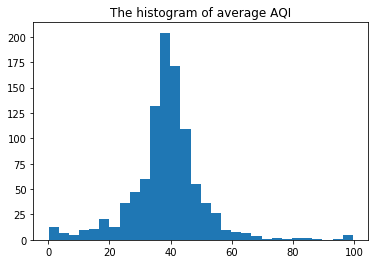

In [83]:
#histogram
plt.hist(combined["avg_aqi"], bins = 30)
plt.title('The histogram of average AQI')
plt.show()

The histogram of the AQI shows us a distribution that looks approximatley like a normal distribution, however it is concentrated around its mean of 39. This is probably due to the high standard deviation of 12.18.

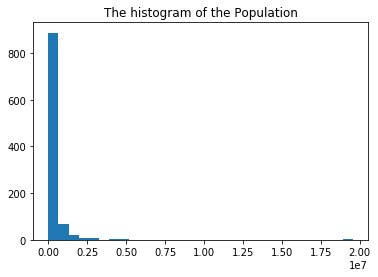

In [84]:
plt.hist(combined["Pop_Estimate"], bins = 30)
plt.title('The histogram of the Population')
plt.show()

From the histogram of the population we can see there are two outliers which means there are two cities whose population is much larger than the mean population. It is highly right skewed. The next histogram is if these two cities are removed.

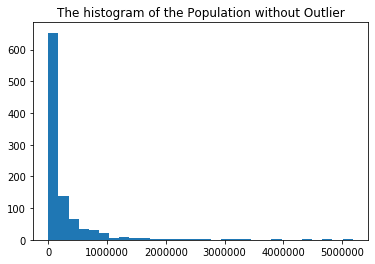

In [85]:
popnoout = combined.loc[combined["Pop_Estimate"] < max(combined["Pop_Estimate"])]
popnoout2 = popnoout.loc[popnoout["Pop_Estimate"] < max(popnoout["Pop_Estimate"])]
plt.hist(popnoout2["Pop_Estimate"], bins = 30)
plt.title('The histogram of the Population without Outlier')
plt.show()

Taking out the two outliers we see that the populations are still highly right skewed. This is probably because there are many more smaller (probably) rural cities than there are larger and overpopulated cities. So even though there is an average of about 324117 people for the cities there are a handful of cities that are much larger than this. 

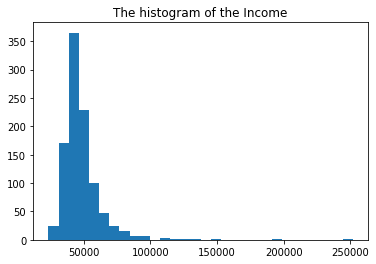

In [86]:
plt.hist(combined["Per capita personal income 2018"], bins = 30)
plt.title('The histogram of the Income')
plt.show()

The above histogram of the personal income is also right skewed as there seems to be two or three cities that have a much higher income than the average of about 48472.

# TO DO: WHICH CITIES HAVE THE INCOMES AND POPULATION THAT ARE "OUTLIERS" (need to plot new scatter plots after removing outliers)

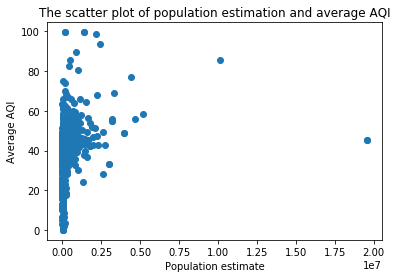

In [87]:
#scatter plot of AQI and population 
plt.scatter(combined["Pop_Estimate"], combined["avg_aqi"])
plt.xlabel('Population estimate')
plt.ylabel('Average AQI')
plt.title('The scatter plot of population estimation and average AQI')
plt.show()

There does not seem to be much of a relationship between population estimate and the average AQI. Most of the data points for average AQI are clustered around an average AQI of 50. There appears to be an outlier as well. 

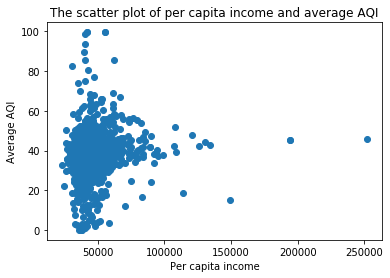

In [88]:
#scatter plot of AQI and income
plt.scatter(combined["Per capita personal income 2018"], combined["avg_aqi"])
plt.xlabel('Per capita income')
plt.ylabel('Average AQI')
plt.title('The scatter plot of per capita income and average AQI')
plt.show()

The above scatter plot shows that it might be worthwhile exploring the relationship with Average AQI in the x-axis

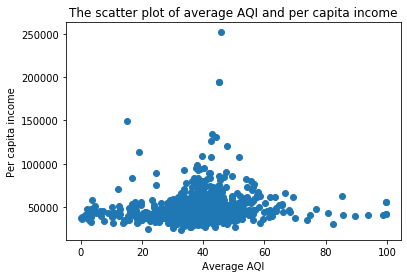

In [89]:
#scatter plot of income and AQI --> might not be necessary
plt.scatter(combined["avg_aqi"], combined["Per capita personal income 2018"])
plt.ylabel('Per capita income')
plt.xlabel('Average AQI')
plt.title('The scatter plot of average AQI and per capita income')
plt.show()

From both the scatter plots, it seems that most counties have a per capita income randing from USD 20,000 till almost 100,000 with a few outliers either way. Most counties seem to be concentrated in the 30-60 AQI range, which is from the good to the moderate range.

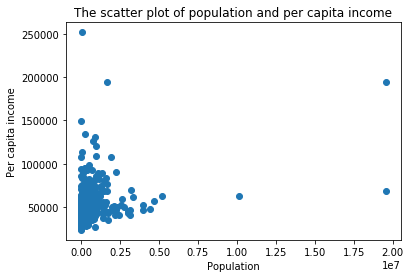

In [90]:
#scatter plot of population and income
plt.scatter(combined["Pop_Estimate"], combined["Per capita personal income 2018"])
#plt.xlim(0, 5000000)
plt.ylabel('Per capita income')
plt.xlabel('Population')
plt.title('The scatter plot of population and per capita income')
plt.show()

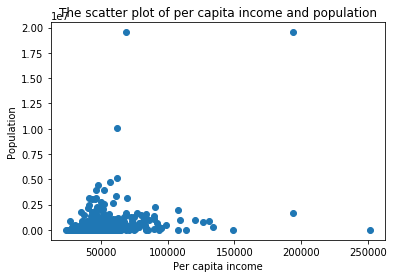

In [91]:
#scatter plot of income and population
plt.scatter(combined["Per capita personal income 2018"], combined["Pop_Estimate"])
#plt.xlim(0, 5000000)
plt.xlabel('Per capita income')
plt.ylabel('Population')
plt.title('The scatter plot of per capita income and population')
plt.show()

# Single Variable Linear Models #need to do t-tests for each coefficient and evaluate its significance

Before proceeding with our data analysis any futher, we realized that the orders of magnitude of our variables are vastly different, which could result in skewed results from our models. Hence, before comparing any two variables together, we added additional columns to our data frame to scale our values so that population and income were in the same scale as AQI index, in order for ease of comparison.

In [92]:
#creating a standardized population column
Pop_standard = combined["Pop_Estimate"]/1000
combined.loc[:, "Pop_standard (1000s)"] = Pop_standard

#creating a standardized income column
Income_standard = combined["Per capita personal income 2018"]/1000
combined.loc[:, "Income_standard (1000s)"] = Income_standard
combined.head()

,Unnamed: 0,State,Abbreviation,County,avg_aqi,Pop_Estimate,Per capita personal income 2018,Pop_standard (1000s),Income_standard (1000s)
0,0,Alabama,AL,Baldwin,36.83,218022,45596,218.022,45.596
1,1,Alabama,AL,Clay,28.99,13275,33530,13.275,33.530
2,2,Alabama,AL,Colbert,35.64,54762,38378,54.762,38.378
3,3,Alabama,AL,DeKalb,36.72,71385,31916,71.385,31.916
4,4,Alabama,AL,Elmore,35.33,81887,42269,81.887,42.269


From now on, we will use the standardized population standardized and income standardized values in order to make the analysis and interpretations from calculations more accurate. 

We first created a model that has the y-variable as the average AQI, and the x-variable as the per capita personal income in 2018. The results are below:

In [93]:
#regression model 1: Y = AQI, X = Income
aqi_income = LinearRegression().fit(combined[["Income_standard (1000s)"]], combined["avg_aqi"])
print("The coefficient of per capita personal income on average AQI is", aqi_income.coef_[0])
print("The intercept of the linear regression is", aqi_income.intercept_)
print("The R^2 score is", aqi_income.score(combined[["Income_standard (1000s)"]], combined["avg_aqi"]))
print("The covariance of AQI and income is", np.cov(combined["Income_standard (1000s)"], 
                                                   combined["avg_aqi"])[0,1])

The coefficient of per capita personal income on average AQI is 0.08916739706416901
The intercept of the linear regression is 34.31999882856415
The R^2 score is 0.014100164586702045
The covariance of AQI and income is 23.48653751520057


The above model shows that a linear regression is not a good fit for modelling the relationship between per capita personal income and average AQI. The slope also indicates a very slight relationship, and the intercept suggests that if a county has 0 personal income, they are likely to be in a good quality air environment. We can disregard the interpretation of an intercept here since no county in our dataset has 0 income. The covariance between average AQI and per capita personal income, however, is positive at 23.49. This is high considering income has been standardized and is in the 1000 order of magnitude. This demonstrates that there is certainly a relationship between the two variables, but not linear like we have just shown.

We now implement a two-sampled t-test to test the significance of the coefficient of income (standardized). The reason we chose to use an independent two-sampled t-test is because our samples are assumed to be unrelated unless proven otherwise. 

In [103]:
#using scipy:
stats.ttest_ind(combined["Income_standard (1000s)"], combined["avg_aqi"], equal_var = False)


Ttest_indResult(statistic=15.308481227826917, pvalue=6.670191999274666e-50)

The p-value is extremely low, which shows that the standardized income's coefficient on the average AQI is significant. 

The next model we look at is switching the variables so that the y-variable is now income and the x-variable is average AQI. Although we know that the $r^2$ value will remain the same, we want to explore the relationship between AQI and income in depth by looking at the relationship through a different lens.

In [104]:
#regression model 2: Y = Income, X = AQI
income_aqi = LinearRegression().fit(combined[["avg_aqi"]], combined["Income_standard (1000s)"])
print("The coefficient of average AQI on per capita personal income is", income_aqi.coef_[0])
print("The intercept of the linear regression is", income_aqi.intercept_)
print("The R^2 score is", income_aqi.score(combined[["avg_aqi"]], combined["Income_standard (1000s)"]))
print("The covariance of AQI and income is", np.cov(combined["avg_aqi"], 
                                                   combined["Income_standard (1000s)"])[0,1])

The coefficient of average AQI on per capita personal income is 0.15813139164032033
The intercept of the linear regression is 42.36170252533823
The R^2 score is 0.014100164586702268
The covariance of AQI and income is 23.48653751520057


When modifying the regression to include average AQI as X and AQI as Y, we found a larger slope which shows that AQI has a larger impact on per capita personal income than the other way around. However, the $r^2$ value is the same across both regressions, showing that a linear model is not a good fit for modelling the relationship. The covariance is the same as the previous regression too. 

The third regression we look at is the y-variable as AQI and the x-variable as population. The results are as below:

In [105]:
#Regression model 3: Y = AQI , X = Population 
population_aqi = LinearRegression().fit(combined[["Pop_standard (1000s)"]], combined["avg_aqi"])
print("The coefficient of population on average AQI is", population_aqi.coef_[0])
print("The intercept of the linear regression is", population_aqi.intercept_)
print("The R^2 score is", population_aqi.score(combined[["Pop_standard (1000s)"]], combined["avg_aqi"]))
print("The covariance of population and AQI is", np.cov(combined["Pop_standard (1000s)"], 
                                                   combined["avg_aqi"])[0,1])

The coefficient of population on average AQI is 0.002630726810813448
The intercept of the linear regression is 37.78947782812453
The R^2 score is 0.05205347435596386
The covariance of population and AQI is 2938.8327727658116


The above model can be interpreted by looking at the $r^2$ value, which shows the strength of the proposed model. This model looks at the relationship between population on AQI index, to see if population has any sort of effect on the average AQI index. The $r^2$ is extremely low, showing that this model is ineffective and the model is not a good fit. The covariance is a pretty high number, this demonstrates that there is certainly a relationship between the two variables, but not linear like we have just shown. The coefficient on the population variable is extremely small, which indicates that there is a very negligible impact of population alone on average AQI.

The fourth regression model below is, again, switching the x and y-variables in order to investigate the relationship between the pair of variables in depth. The y-variable is now population and the x-variable is AQI. 

In [106]:
#Regression model 4: Y = Population , X = AQI
aqi_population = LinearRegression().fit(combined[["avg_aqi"]], combined["Pop_standard (1000s)"])
print("The coefficient of average AQI on population is", aqi_population.coef_[0])
print("The intercept of the linear regression is", aqi_population.intercept_)
print("The R^2 score is", aqi_population.score(combined[["avg_aqi"]], combined["Pop_standard (1000s)"]))
print("The covariance of average AQI and population is", np.cov(combined["avg_aqi"], 
                                                   combined["Pop_standard (1000s)"])[0,1])

The coefficient of average AQI on population is 19.786727432890846
The intercept of the linear regression is -440.4841415971989
The R^2 score is 0.05205347435596386
The covariance of average AQI and population is 2938.8327727658116


Here, we get again get the same positive $r^2$ value as in regression 3 as well as the same covariance. This means that the model is not a good fit either, which we expected based on our calculation above, but there is still a relationship. Indeed, the coefficient on the AQI variable shows us that there seems to be a big effect of AQI on population. 

The fifth single-variable regression model we will analyze is with the y-variable as income and the x-variable as population. The results are below:

In [107]:
#Regression model 5: Y = Income , X = Population
population_income = LinearRegression().fit(combined[["Pop_standard (1000s)"]], combined["Income_standard (1000s)"])
print("The coefficient of population on income is", population_income.coef_[0])
print("The intercept of the linear regression is", population_income.intercept_)
print("The R^2 score is", population_income.score(combined[["Pop_standard (1000s)"]], combined["Income_standard (1000s)"]))
print("The covariance of population size and income is", np.cov(combined["Pop_standard (1000s)"], 
                                                  combined["Income_standard (1000s)"])[0,1])

The coefficient of population on income is 0.004777396231782729
The intercept of the linear regression is 46.92380102916758
The R^2 score is 0.09679852549091117
The covariance of population size and income is 5336.916230427466


Once again, the $r^2$ value is extremely low, suggesting a linear regression is not a good fit. It does seem like the two variables are related since the covariance value is high, but the coefficient of population is low. 

Conducting a sixth single-variate linear regression: 

In [108]:
#Regression model 5: Y = Income , X = Population
income_population = LinearRegression().fit(combined[["Income_standard (1000s)"]], combined["Pop_standard (1000s)"])
print("The coefficient of income on population is", income_population.coef_[0])
print("The intercept of the linear regression is", income_population.intercept_)
print("The R^2 score is", income_population.score(combined[["Income_standard (1000s)"]], combined["Pop_standard (1000s)"]))
print("The covariance of population size and income is", np.cov(combined["Income_standard (1000s)"], 
                                                  combined["Pop_standard (1000s)"])[0,1])

The coefficient of income on population is 20.261774572294588
The intercept of the linear regression is -658.0161718053486
The R^2 score is 0.09679852549091128
The covariance of population size and income is 5336.916230427466


The analysis is same as the fifth linear regression, however the coefficient of income on population is higher than the coefficient of population on income. 

# Multivariate Linear Models

In [109]:
#Now, we will look at the effect of two predictor variables one the one response variable (multiple regression)

In [110]:
#Multiple Regression model 1: Y = AQI index, X = Population estimate and income ("Per capita personal income 2018")
popandincome_aqi = LinearRegression().fit(combined[["Pop_standard (1000s)","Income_standard (1000s)"]], combined["avg_aqi"])
print("The coefficient of population on aqi is ", popandincome_aqi.coef_[0])
print("The coefficient of income on aqi is ", popandincome_aqi.coef_[1])
print("The intercept of the linear regression is", popandincome_aqi.intercept_)
print("The R^2 score is", popandincome_aqi.score(combined[["Pop_standard (1000s)","Income_standard (1000s)"]], combined["avg_aqi"]))


The coefficient of population on aqi is  0.002441026599607291
The coefficient of income on aqi is  0.03970786637795131
The intercept of the linear regression is 35.92623380691277
The R^2 score is 0.05457898815227902


In [111]:
#Multiple Regression model 2: Y = Income, X = Population estimate and AQI index
popandaqi_income = LinearRegression().fit(combined[["Pop_standard (1000s)","avg_aqi"]], combined["Income_standard (1000s)"])
print("The coefficient of population on aqi is ", popandaqi_income.coef_[0])
print("The coefficient of income on aqi is ", popandaqi_income.coef_[1])
print("The intercept of the linear regression is", popandaqi_income.intercept_)
print("The R^2 score is", popandaqi_income.score(combined[["Pop_standard (1000s)","avg_aqi"]], combined["Income_standard (1000s)"]))


The coefficient of population on aqi is  0.004600887942703475
The coefficient of income on aqi is  0.06709487596877282
The intercept of the linear regression is 44.388320701364876
The R^2 score is 0.09920482977392475


# Evaluation of Significance 

In [ ]:
#Multivariate linear models significance tests 

# Conclusion

Our team conducted various linear and multiple regressions and significance tests to determine if there is any significant relationship between the three variables. First, through the summary statistics and visuals, we can see that average AQI of the counties in the U.S. had a distribution closest to a normal distribution. The other two were heavily skewed right. We kept this in mind going through the rest of the analysis. 

After conducting linear regressions amongst combinations of the variables (one predictor and one response), we noticed that the highesr r-squared value belonged to the model relating income and population. The lowest r-squared value was between income and average AQI. We further conducted a t-test on these models to determine if the outcome is significant or not, and both produced p-values of approximately 0. We compared that to an alpha level of 0.05, telling us that the relationship between income-population and income-AQI is significant. 

We wanted to see the effect of two predictors one on response variable, to compare the r-squared values again. The highest r-squared value was noticed between population and AQI as the predictors and income as the response. This told us there is some effect of these variables on the response variable. We did a significance test to verify this, and saw TALK ABOUT WHAT YOU SAY IN THE T-TEST FOR THE MULTIPLE REGRESSION


# Acknowledgements

Our combined dataset was from these three individual datasets: 
Datasources
Income - https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas
Data on AQI - https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
Population estimates - https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

All of their respective websites were helpful for us to understand more about the data and learn why they were collected.
We also used a lot of Professor Mimno's lectures to guide our understanding of various topics and code used in our data analysis. Our project advisor, Shimona Agarwal, was also helpful in understanding the project requirements and ensuring our analysis is sufficient. 

We used these following sources for help as well: 
To convert the strings in population estimation column to numbers: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python 
https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c